In [1]:
import numpy as np
from librosa import stft
import matplotlib.pyplot as plt
import time
import tqdm
import pandas as pd

from essentia.standard import Spectrum, Windowing, FrameGenerator, SpectrumCQ

In [2]:
y_list = np.load('./y_list.npy')

In [3]:
y_list_int = y_list.astype(int)

In [4]:
w = Windowing(type = 'hann')
spectrum = SpectrumCQ(binsPerOctave=24, minFrequency=55, numberBins=84*2, sampleRate=44100)


In [5]:
output_list = []
timing = []
for e in range(5):
    t_start = time.time()
    for audio in tqdm.tqdm(y_list_int):
        specs = []
        for frame in FrameGenerator(audio, frameSize=32768, hopSize=512, startFromZero=False):
            spec = spectrum(w(frame))
            specs.append(spec)
        output_list.append(specs)
    time_used = time.time()-t_start
    print(time_used)
    timing.append(time_used)

  0%|          | 1/1770 [00:00<03:05,  9.55it/s]

187.05078744888306


  0%|          | 1/1770 [00:00<03:05,  9.51it/s]

186.13247919082642


  0%|          | 1/1770 [00:00<03:06,  9.50it/s]

186.17049527168274


  0%|          | 1/1770 [00:00<03:06,  9.51it/s]

186.21296787261963


100%|██████████| 1770/1770 [03:06<00:00,  9.49it/s]

186.24136996269226


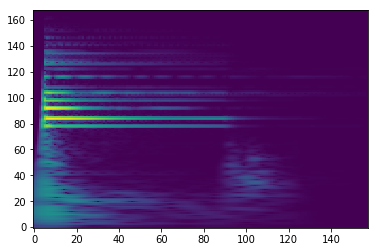

In [6]:
plt.imshow(np.log(np.array(specs).T+1), aspect='auto', origin='lower')